In [ ]:
# 얼굴인식(얼굴정보)-세로*가로*3 넘파이 -> 1*512(임베딩데이터로 변환) -> X, y를 머신러닝(SVM)

# 1. 데이터 셋 다운로드 및 압축해제
-[kaggle](https://www.kaggle.com/datasets/dansbecker/5-celebrity-faces-dataset?resource=download)

In [1]:
!unzip data/5celebrity.zip -d data/5celebrity/

Archive:  data/5celebrity.zip
   creating: data/5celebrity/train/
   creating: data/5celebrity/train/ben_afflek/
  inflating: data/5celebrity/train/ben_afflek/httpcsvkmeuaeccjpg.jpg  
  inflating: data/5celebrity/train/ben_afflek/httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg  
  inflating: data/5celebrity/train/ben_afflek/httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg  
  inflating: data/5celebrity/train/ben_afflek/httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg  
  inflating: data/5celebrity/train/ben_afflek/httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg  
  inflating: data/5celebrity/train/ben_afflek/httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg  
  inflating: data/5celebrity/train/ben_afflek/httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg  
  inflating: data/5celebrity/train/ben_afflek/httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg  


# 2. 얼굴 Detect

In [2]:
! pip install mtcnn

     ---------------------------------------- 1.9/1.9 MB 17.3 MB/s eta 0:00:00
     ------------------------------------- 301.8/301.8 kB 18.2 MB/s eta 0:00:00
     ---------------------------------------- 99.8/99.8 kB ? eta 0:00:00
  Attempting uninstall: lz4
    Found existing installation: lz4 3.1.3
    Uninstalling lz4-3.1.3:
      Successfully uninstalled lz4-3.1.3
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1


In [5]:
from mtcnn import MTCNN
import PIL
import numpy as np
import matplotlib.pyplot as plt
import cv2

## 2.1 MTCNN을 이용해서 얼굴 형태 탐지

In [6]:
detector = MTCNN()
image = cv2.imread('data/5celebrity/train/ben_afflek/httpcsvkmeuaeccjpg.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
result = detector.detect_faces(image)
result

[{'box': [14, 30, 76, 92],
  'confidence': 0.9998857975006104,
  'keypoints': {'nose': [36, 91],
   'mouth_right': [64, 98],
   'right_eye': [51, 63],
   'left_eye': [27, 75],
   'mouth_left': [44, 109]}}]

## 2-2 탐지한 얼굴 그려보기

In [15]:
box = result[0]['box'] # 왼쪽위 부분의 x, y, width, height
x, y, w, h = box
keypoints = result[0]['keypoints'] # nose좌표, mouth_right좌표, right_eye, left_eye, mouth_left
cv2.rectangle(image,
             (x, y), # 사각형 왼쪽윗부분 좌표
             (x+w, y+h), # 사각형 오른쪽 밑부분 좌표
             (0, 155, 255),
             2)
cv2.circle(image, keypoints['nose'], # 원의 중심점
          2, # 반지름
          (255,0,0), # 원 색상
          2)
cv2.circle(image, keypoints['mouth_right'], # 원의 중심점
          2, # 반지름
          (255,0,0), # 원 색상
          2)
cv2.circle(image, keypoints['right_eye'], # 원의 중심점
          2, # 반지름
          (255,0,0), # 원 색상
          2)
cv2.circle(image, keypoints['left_eye'], # 원의 중심점
          2, # 반지름
          (255,0,0), # 원 색상
          2)
cv2.circle(image, keypoints['mouth_left'], # 원의 중심점
          2, # 반지름
          (255,0,0), # 원 색상
          2)
cv2.imwrite('data/ben.jpg', cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

face = image[y:y+h, x:x+w]
cv2.imwrite('data/benface.jpg', cv2.cvtColor(face, cv2.COLOR_RGB2BGR))

True

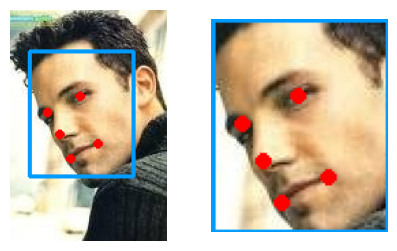

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(5,3))
axes[0].imshow(image)
axes[0].axis('off')
axes[1].imshow(face)
axes[1].axis('off')
plt.show()

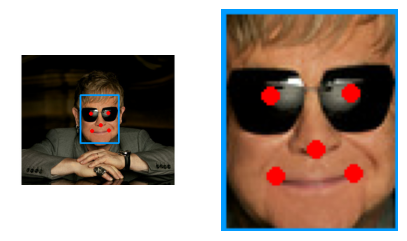

In [18]:
image = cv2.imread('data/5celebrity/train/elton_john/12.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
result = detector.detect_faces(image)
box = result[0]['box'] # 왼쪽위 부분의 x, y, width, height
x, y, w, h = box
keypoints = result[0]['keypoints'] # nose좌표, mouth_right좌표, right_eye, left_eye, mouth_left
cv2.rectangle(image,
             (x, y), # 사각형 왼쪽윗부분 좌표
             (x+w, y+h), # 사각형 오른쪽 밑부분 좌표
             (0, 155, 255),
             2)
cv2.circle(image, keypoints['nose'], # 원의 중심점
          2, # 반지름
          (255,0,0), # 원 색상
          2)
cv2.circle(image, keypoints['mouth_right'], # 원의 중심점
          2, # 반지름
          (255,0,0), # 원 색상
          2)
cv2.circle(image, keypoints['right_eye'], # 원의 중심점
          2, # 반지름
          (255,0,0), # 원 색상
          2)
cv2.circle(image, keypoints['left_eye'], # 원의 중심점
          2, # 반지름
          (255,0,0), # 원 색상
          2)
cv2.circle(image, keypoints['mouth_left'], # 원의 중심점
          2, # 반지름
          (255,0,0), # 원 색상
          2)
face = image[y:y+h, x:x+w]
fig, axes = plt.subplots(1, 2, figsize=(5,3))
axes[0].imshow(image)
axes[0].axis('off')
axes[1].imshow(face)
axes[1].axis('off')
plt.show()

## 2.3 입력형식에 맞게 차원 변환

In [19]:
face.shape

(83, 66, 3)

In [21]:
face_data = np.expand_dims(face, axis=0)
face_data = face[np.newaxis, :]
face_data.shape

(1, 83, 66, 3)

# 3. Facenet 활용하여 임베딩 데이터로 변환(face data)
- face_data : 1x83x66x3
- 임베딩 데이터 : 1x512

In [29]:
! pip install keras-facenet

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10387 sha256=24a299b2bf0e7c8dd101983f3c5d22001d8db6ceb1816fcc43ecba869ffdb236
  Stored in directory: c:\users\4545\appdata\local\pip\cache\wheels\b4\70\d0\0f19dd7e718b546b908ff9027dbd752b0686eb2fa32333e084
Successfully built keras-facenet


In [30]:
from keras_facenet import FaceNet
model = FaceNet()

## 3-1 이미지 데이터를 FaceNet 임베딩 데이터로 변환

In [31]:
# face_data 얼굴 이미지이거나 얼굴 특징 데이터가 있는 이미지를 유사성을 측정 할 수 잇는 1x512배열
face_embedding = model.embeddings(face_data)
face_embedding.shape

1/1 [==============================] - 4s 4s/step


(1, 512)

In [32]:
face_embedding[0, :10]

array([ 0.03780314, -0.02592947, -0.09773736,  0.03493551, -0.03435565,
        0.07535117, -0.04571976,  0.05970177, -0.04137714, -0.01189434],
      dtype=float32)

# 4. 분류모델을 만들기 위해서 데이터셋 생성
- X_train(n개x512), y_train(n개) n은 train 폴더안의 사진 갯수
- X_test(m개x512), y_test(m개) m은 test 폴더안의 사진 갯수
## 4-1 y_train(사람이름)과 X_train에 사용될 이미지 경로(x_train_path)
- y_test(사람이름)과 X_test에 사용될 이미지 경로(x_test_path)

In [33]:
import os
train_path = 'data/5celebrity/train'
test_path = 'data/5celebrity/val'

In [36]:
for x in os.walk(train_path):
    print(x)
    print('---------------------')

('data/5celebrity/train', ['ben_afflek', 'elton_john', 'jerry_seinfeld', 'madonna', 'mindy_kaling'], [])
---------------------
('data/5celebrity/train\\ben_afflek', [], ['httpcsvkmeuaeccjpg.jpg', 'httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg', 'httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg', 'httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg', 'httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg', 'httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg', 'httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg', 'httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg', 'httptrwebimgacstanetcxbdddmediasnmediajpg.jpg', 'httpwwwaceshowbizcomimagesphotobenaffleckjpg.jpg', 'httpwwwallposterscomimagesPostersPFjpg.jpg', 'httpwwwfilmscoopitcgibinattoriBENAFFLECKBENAFFLECKjpg.jpg', 'httpwwwhillsindcomstorebenjpg.jpg', 'httpwwwrumenewscomwpcontentuploadsbenafflekxpng.jpg'])
--

In [47]:
def get_path(path):
    x_path = []
    y = []
    for x in os.walk(path):
        if len(x[2])==0:
#             print(x, '에는 파일이 없습니다.')
            continue
        name = os.path.basename(x[0])
        print(name, '사진', len(x[2]), '장 parsing 중')
        for file_name in x[2]:
            image_full_path = x[0] + '/' + name + '/' + file_name
            x_path.append(image_full_path)
            y.append(name)
#     print(len(y))
#     print(len(x_path))
#     for name, path in zip(y, x_path):
#         print(name, path)
    return x_path, y

In [49]:
# get_path(train_path)
x_train_path, y_train = get_path(train_path)
x_test_path, y_test = get_path(test_path)

ben_afflek 사진 14 장 parsing 중
elton_john 사진 16 장 parsing 중
jerry_seinfeld 사진 21 장 parsing 중
madonna 사진 19 장 parsing 중
mindy_kaling 사진 22 장 parsing 중
ben_afflek 사진 5 장 parsing 중
elton_john 사진 5 장 parsing 중
jerry_seinfeld 사진 5 장 parsing 중
madonna 사진 5 장 parsing 중
mindy_kaling 사진 5 장 parsing 중


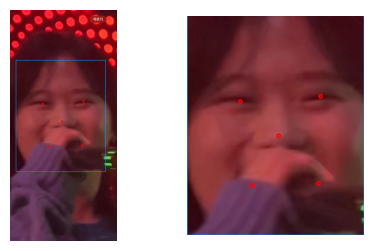

In [28]:
detector = MTCNN()
image = cv2.imread('data/KakaoTalk_20241226_164253594.jpg',
                  cv2.IMREAD_ANYCOLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
result = detector.detect_faces(image)
resultbox = result[0]['box'] # 왼쪽위 부분의 x, y, width, height
x, y, w, h = box
keypoints = result[0]['keypoints'] # nose좌표, mouth_right좌표, right_eye, left_eye, mouth_left
cv2.rectangle(image,
             (box[0], box[1]), # 사각형 왼쪽윗부분 좌표
             (box[0]+box[2], box[1]+box[3]), # 사각형 오른쪽 밑부분 좌표
             (0, 155, 255),
             2)
cv2.circle(image, keypoints['nose'], # 원의 중심점
           5, # 반지름
           (255,0,0), # 원 색상
           3
          )
cv2.circle(image, keypoints['mouth_right'], # 원의 중심점
           5, # 반지름
           (255,0,0), # 원 색상
           3
          )
cv2.circle(image, keypoints['right_eye'], # 원의 중심점
           5, # 반지름
           (255,0,0), # 원 색상
           3
          )
cv2.circle(image, keypoints['left_eye'], # 원의 중심점
           5, # 반지름
           (255,0,0), # 원 색상
           3
          )
cv2.circle(image, keypoints['mouth_left'], # 원의 중심점
           5, # 반지름
           (255,0,0), # 원 색상
           3
          )
face = image[y:y+h,x:x+w]
fig, axes = plt.subplots(1, 2, figsize=(5,3))
axes[0].imshow(image)
axes[0].axis('off')
axes[1].imshow(face)
axes[1].axis('off')
plt.show()